In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('customer_shopping_data.csv')

In [4]:
df1=df

In [5]:
df1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [9]:
df1.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [6]:
df1.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(99457, 10)

In [13]:
category=df.select_dtypes(include="object")
category.head()
category_result=['gender', 'category', 'payment_method', 'shopping_mall']

In [14]:
numbers=df.select_dtypes(include="int64")
numbers.head()

,age,quantity
0,28,5
1,21,3
2,20,1
3,66,5
4,53,4


In [15]:
df1.nunique()

invoice_no        99457
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                40
payment_method        3
invoice_date        797
shopping_mall        10
dtype: int64

In [16]:
for unique in category_result:
  print(unique)
  print(df1[unique].unique())

gender
['Female' 'Male']
category
['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
payment_method
['Credit Card' 'Debit Card' 'Cash']
shopping_mall
['Kanyon' 'Forum Istanbul' 'Metrocity' 'Metropol AVM' 'Istinye Park'
 'Mall of Istanbul' 'Emaar Square Mall' 'Cevahir AVM' 'Viaport Outlet'
 'Zorlu Center']


In [18]:
for cat in category_result:
  print(f'{df1[cat].value_counts()}')

gender
Female    59482
Male      39975
Name: count, dtype: int64
category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64
payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64
shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64


In [19]:
df1['year']=pd.to_datetime(df1['invoice_date'], dayfirst=True).dt.year
df1['month']=pd.to_datetime(df1['invoice_date'], dayfirst=True).dt.month
df1['day']=pd.to_datetime(df1['invoice_date'], dayfirst=True).dt.day

In [21]:
df1.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month,day
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,2022,8,5
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,2021,12,12


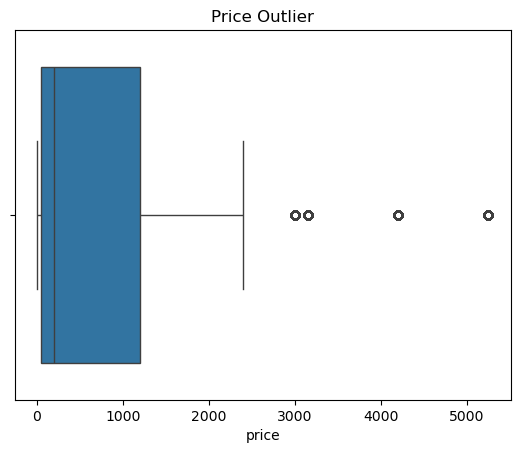

In [27]:
sns.boxplot(x=df1['price'])
plt.title("Price Outlier")
plt.show()

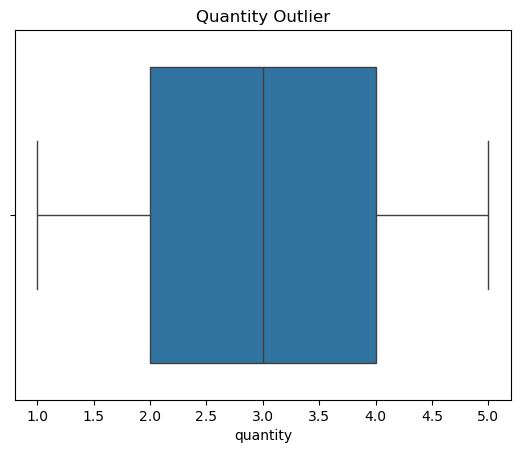

In [26]:
sns.boxplot(x=df1['quantity'])
plt.title("Quantity Outlier")
plt.show()

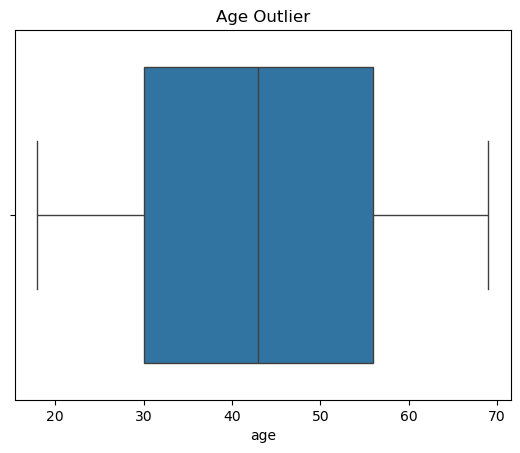

In [25]:
sns.boxplot(x=df1['age'])
plt.title("Age Outlier")
plt.show()

In [ ]:
## How is the sales performance in shopping centers?

In [28]:
total_sales_per_mall=df1.groupby('shopping_mall')['price'].sum().sort_values(ascending=False)
total_sales_per_mall

shopping_mall
Mall of Istanbul     13851737.62
Kanyon               13710755.24
Metrocity            10249980.07
Metropol AVM          6937992.99
Istinye Park          6717077.54
Zorlu Center          3509649.02
Cevahir AVM           3433671.84
Viaport Outlet        3414019.46
Emaar Square Mall     3390408.31
Forum Istanbul        3336073.82
Name: price, dtype: float64

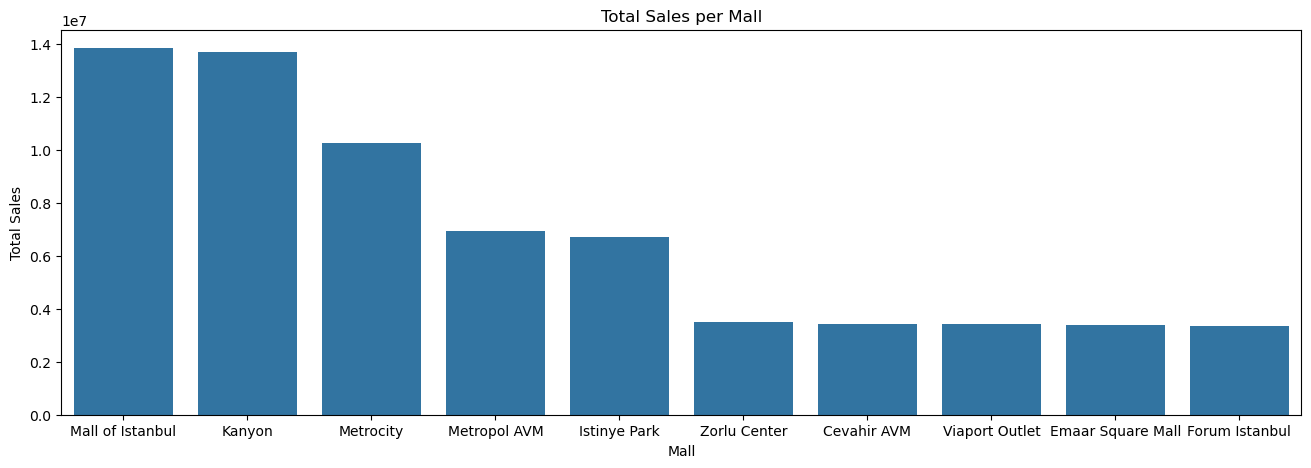

In [34]:
plt.figure(figsize=(16,5))
sns.barplot(x=total_sales_per_mall.index, y=total_sales_per_mall.values)
plt.title('Total Sales per Mall')
plt.xlabel('Mall')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
## In which shopping mall do customers buy individually, and in which ones do they buy in bulk?

In [46]:
total_quantity_per_mall=df1.groupby(['shopping_mall','quantity'])['quantity'].sum().sort_values(ascending=False)
total_quantity_per_mall

shopping_mall      quantity
Mall of Istanbul   5           20220
Kanyon             5           20045
Mall of Istanbul   4           15780
Kanyon             4           15560
Metrocity          5           14630
Mall of Istanbul   3           12276
Kanyon             3           12054
Metrocity          4           12052
Metropol AVM       5           10255
Istinye Park       5            9950
Metrocity          3            9150
Metropol AVM       4            8096
Mall of Istanbul   2            7952
Istinye Park       4            7864
Kanyon             2            7784
Metrocity          2            6080
Metropol AVM       3            6072
Istinye Park       3            5775
Forum Istanbul     5            5030
Cevahir AVM        5            5025
Viaport Outlet     5            4975
Zorlu Center       5            4970
Emaar Square Mall  5            4850
Zorlu Center       4            4140
Metropol AVM       2            4090
Kanyon             1            4014
Istinye Pa

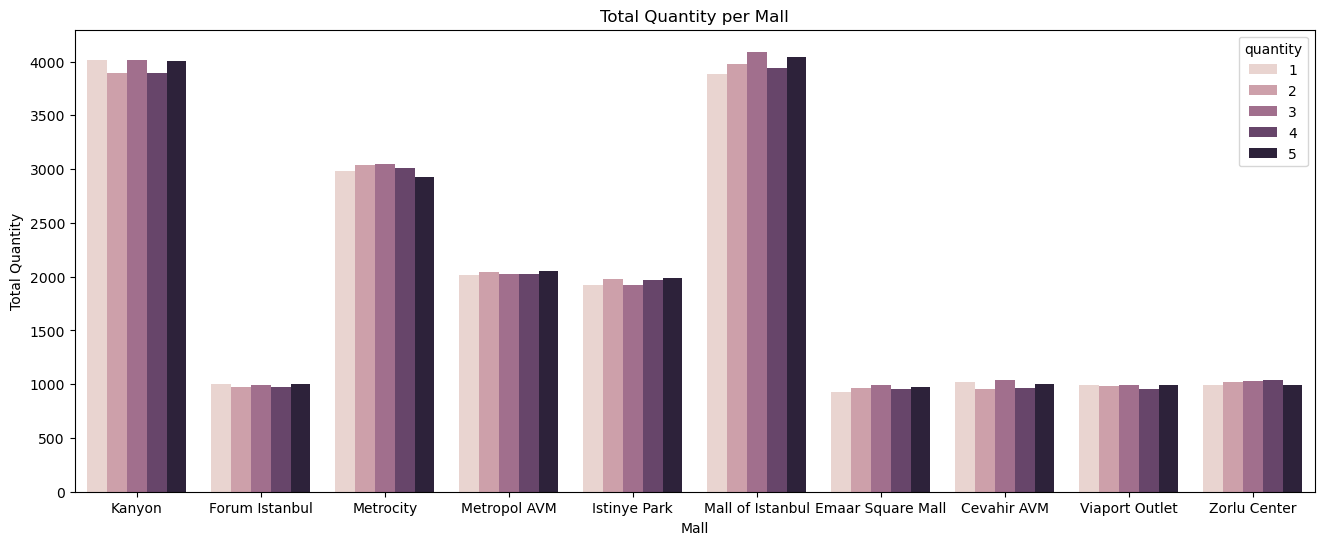

In [45]:
plt.figure(figsize=(16,6))
sns.countplot(data=df1, x='shopping_mall', hue='quantity')
plt.title('Total Quantity per Mall')
plt.xlabel('Mall')
plt.ylabel('Total Quantity')
plt.show()

In [ ]:
## Which shopping center is the leader in which field?

In [47]:
category_per_mall_count=df1.groupby(['shopping_mall', 'category'])['category'].count()
category_per_mall_count

shopping_mall  category       
Cevahir AVM    Books               258
               Clothing           1729
               Cosmetics           732
               Food & Beverage     772
               Shoes               490
                                  ... 
Zorlu Center   Food & Beverage     750
               Shoes               519
               Souvenir            257
               Technology          250
               Toys                513
Name: category, Length: 80, dtype: int64

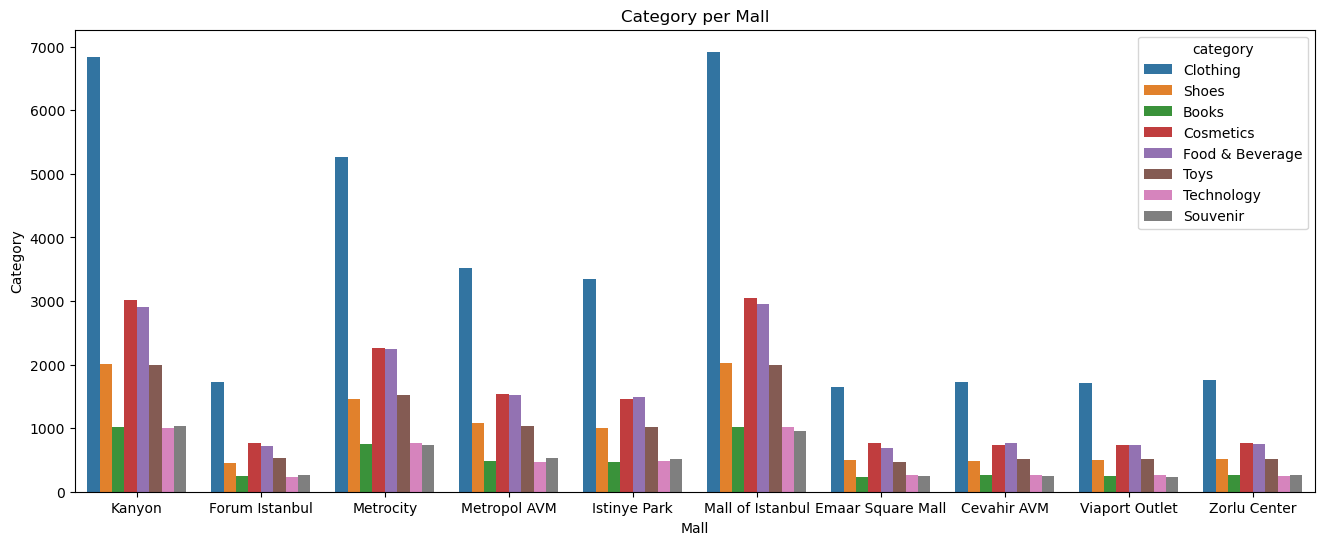

In [48]:
plt.figure(figsize=(16,6))
sns.countplot(data=df1, x='shopping_mall', hue='category')
plt.title('Category per Mall')
plt.xlabel('Mall')
plt.ylabel('Category')
plt.show()

In [ ]:
## Which shopping center attracts more young people and which one attracts more older people?

In [42]:
age_labels=[df['age'].min() - 1, 25, 35, 45, 69]
age_bins=['25<','25-35', '35-45', '45-69']
df1['age_groups']=pd.cut(df['age'], bins=age_labels, labels=age_bins)

In [49]:
age_grouped_per_mall_count=df1.groupby(['shopping_mall', 'age_groups'])['age_groups'].count().sort_values(ascending=False)
age_grouped_per_mall_count

shopping_mall      age_groups
Mall of Istanbul   45-69         9171
Kanyon             45-69         9116
Metrocity          45-69         6903
Metropol AVM       45-69         4577
Istinye Park       45-69         4476
Kanyon             35-45         3937
Mall of Istanbul   35-45         3875
                   25-35         3774
Kanyon             25-35         3695
Mall of Istanbul   25<           3123
Kanyon             25<           3075
Metrocity          35-45         2923
                   25-35         2907
Zorlu Center       45-69         2379
Forum Istanbul     45-69         2305
Metrocity          25<           2278
Cevahir AVM        45-69         2246
Viaport Outlet     45-69         2233
Emaar Square Mall  45-69         2197
Metropol AVM       35-45         2034
                   25-35         1951
Istinye Park       25-35         1903
                   35-45         1887
Metropol AVM       25<           1599
Istinye Park       25<           1515
Cevahir AVM        2

<Axes: xlabel='shopping_mall', ylabel='count'>

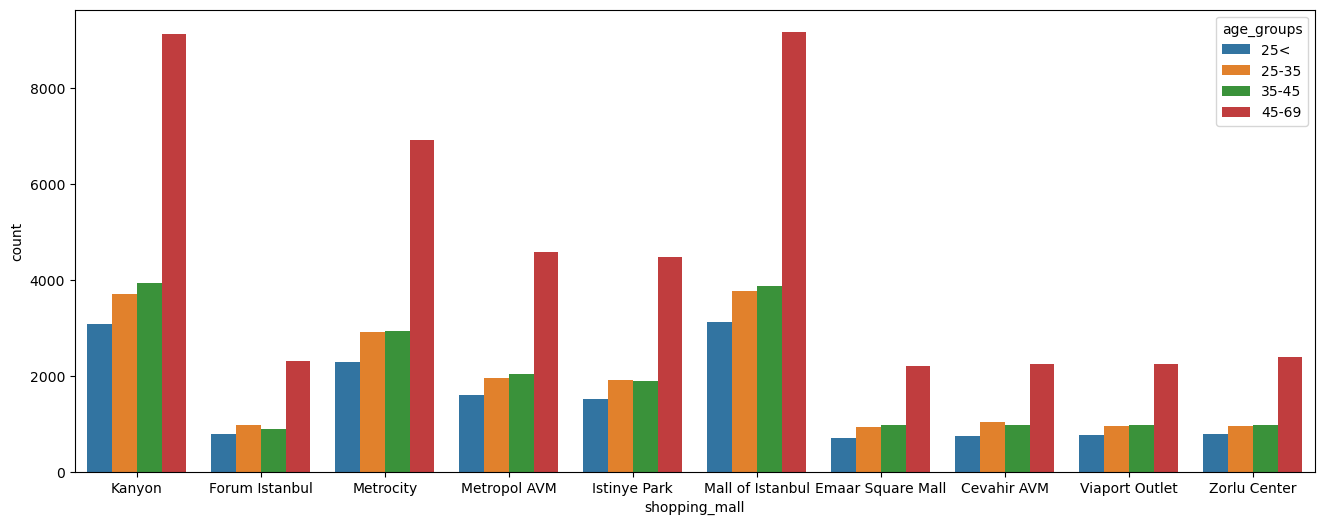

In [50]:
plt.figure(figsize=(16,6))
sns.countplot(data=df1, x='shopping_mall', hue='age_groups')

In [ ]:
## Impact of Payment Methods

In [52]:
payment_method_per_mall_count=df1.groupby(['shopping_mall', 'payment_method'])['payment_method'].count().sort_values(ascending=False)
payment_method_per_mall_count

shopping_mall      payment_method
Mall of Istanbul   Cash              8894
Kanyon             Cash              8853
Mall of Istanbul   Credit Card       7019
Kanyon             Credit Card       6916
Metrocity          Cash              6625
                   Credit Card       5347
Metropol AVM       Cash              4559
Istinye Park       Cash              4436
Kanyon             Debit Card        4054
Mall of Istanbul   Debit Card        4030
Metropol AVM       Credit Card       3521
Istinye Park       Credit Card       3422
Metrocity          Debit Card        3039
Zorlu Center       Cash              2324
Viaport Outlet     Cash              2231
Cevahir AVM        Cash              2228
Forum Istanbul     Cash              2183
Emaar Square Mall  Cash              2114
Metropol AVM       Debit Card        2081
Istinye Park       Debit Card        1923
Cevahir AVM        Credit Card       1779
Zorlu Center       Credit Card       1760
Forum Istanbul     Credit Card       1750


<Axes: xlabel='shopping_mall', ylabel='count'>

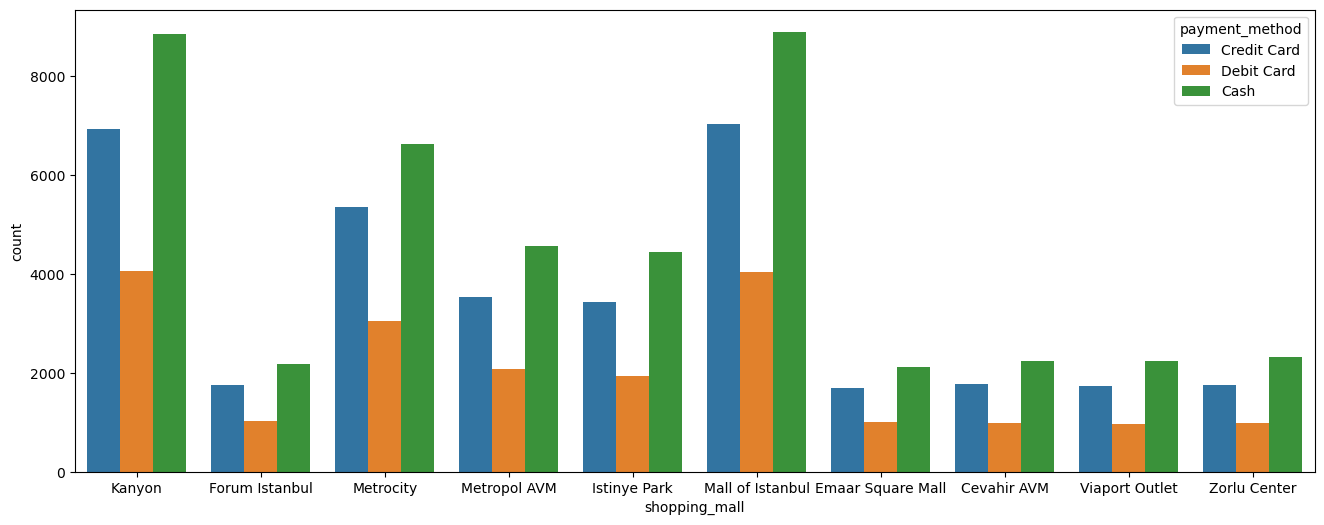

In [53]:
plt.figure(figsize=(16,6))
sns.countplot(data=df, x='shopping_mall', hue='payment_method')

In [ ]:
## Which payment method brings in higher returns?

In [54]:
payment_method1=df1.groupby('payment_method')['price'].sum().sort_values(ascending=False)
payment_method1

payment_method
Cash           30705030.98
Credit Card    24051476.93
Debit Card     13794858.00
Name: price, dtype: float64

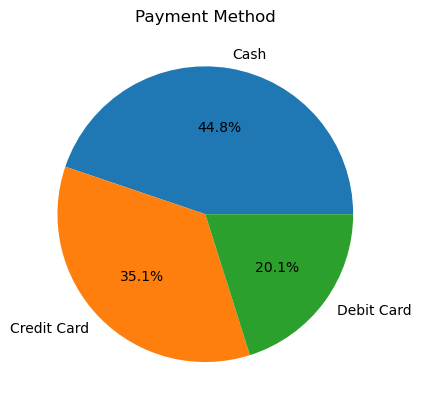

In [55]:
plt.pie(payment_method1, labels=payment_method1.index, autopct='%1.1f%%')
plt.title('Payment Method')
plt.show()

In [ ]:
## High-value transaction

In [56]:
high_value=df1.groupby('category')['price'].max().sort_values(ascending=False)
high_value

category
Technology         5250.00
Shoes              3000.85
Clothing           1500.40
Cosmetics           203.30
Toys                179.20
Books                75.75
Souvenir             58.65
Food & Beverage      26.15
Name: price, dtype: float64

In [ ]:
## In which categories were the largest transactions recorded?

In [57]:
largest_transactions_recorded= df1[df1['price'].isin([5250, 3000.85])]
largest_transactions_recorded.groupby(['payment_method','category']).size()

payment_method  category  
Cash            Shoes         902
                Technology    452
Credit Card     Shoes         703
                Technology    348
Debit Card      Shoes         408
                Technology    201
dtype: int64

<Axes: xlabel='payment_method', ylabel='count'>

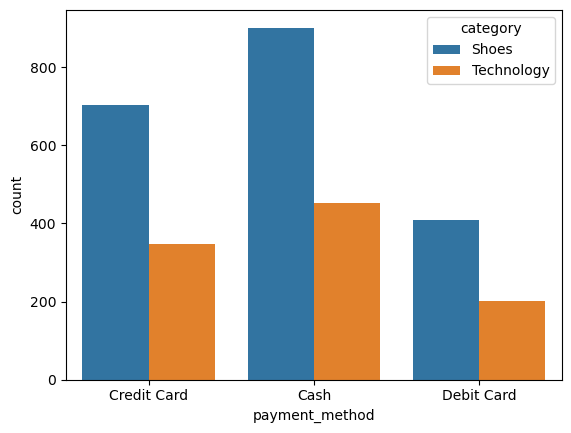

In [58]:
sns.countplot(data=largest_transactions_recorded, x='payment_method', hue='category')

In [ ]:
## The most expensive products are paid the most in cash 
## Credit cards are also one of the main tools that generate high income and are widely used, especially in purchasing expensive technological products and clothing.

In [ ]:
## Do young people or older people prefer cash payments in technology sales?

In [59]:
high_amount=df1[df1['price'].isin([5250, 3000.85])]
high_amount.groupby(['payment_method','age_groups','category']).size()

payment_method  age_groups  category  
Cash            25<         Shoes         148
                            Technology     68
                25-35       Shoes         187
                            Technology     81
                35-45       Shoes         191
                            Technology    109
                45-69       Shoes         376
                            Technology    194
Credit Card     25<         Shoes          96
                            Technology     42
                25-35       Shoes         129
                            Technology     64
                35-45       Shoes         140
                            Technology     75
                45-69       Shoes         338
                            Technology    167
Debit Card      25<         Shoes          63
                            Technology     28
                25-35       Shoes          81
                            Technology     31
                35-45       Shoes        

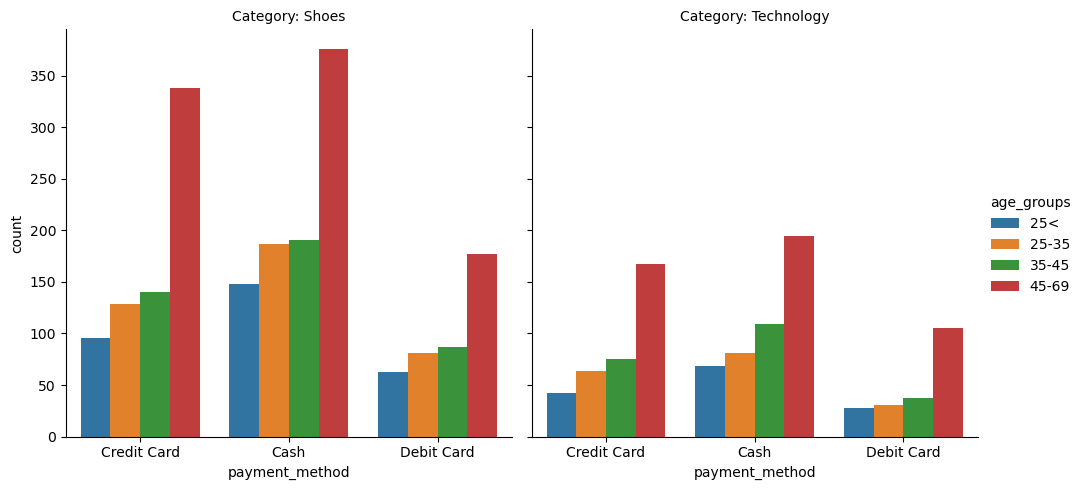

In [61]:
g = sns.catplot(
    data=high_amount,
    x='payment_method',
    hue='age_groups',
    col='category',
    kind='count'
)

g.set_titles("Category: {col_name}")

In [ ]:
## Is there a difference between men's and women's cash technology spending?

In [63]:
gender_pament_method_grouped=high_amount.groupby(['gender', 'payment_method'])['price'].sum()
gender_pament_method_grouped

gender  payment_method
Female  Cash              3131707.30
        Credit Card       2379358.70
        Debit Card        1260196.35
Male    Cash              1948059.40
        Credit Card       1557238.85
        Debit Card        1019400.45
Name: price, dtype: float64

<Axes: xlabel='gender', ylabel='count'>

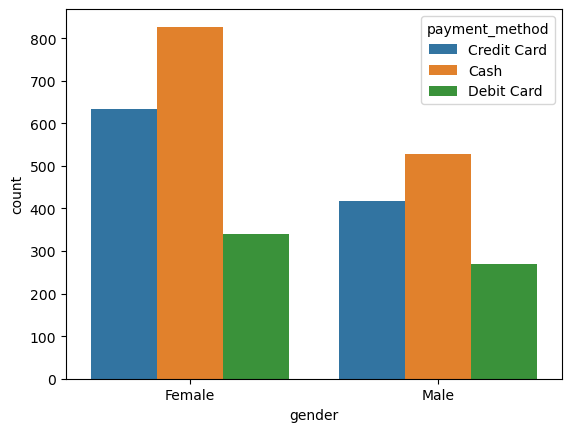

In [64]:
sns.countplot(data=high_amount, x='gender', hue='payment_method')

In [ ]:
## In which shopping centers do cash payments generate the most revenue?

In [65]:
cash_payment=df1[df1['payment_method'].isin(['Cash'])]
cash_payment.groupby('shopping_mall')['price'].sum().sort_values(ascending=False)

shopping_mall
Mall of Istanbul     6241779.56
Kanyon               6205221.67
Metrocity            4552782.39
Metropol AVM         3103319.49
Istinye Park         3012008.82
Zorlu Center         1549183.46
Emaar Square Mall    1546176.25
Viaport Outlet       1545471.68
Cevahir AVM          1519323.38
Forum Istanbul       1429764.28
Name: price, dtype: float64

<Axes: xlabel='shopping_mall', ylabel='Count'>

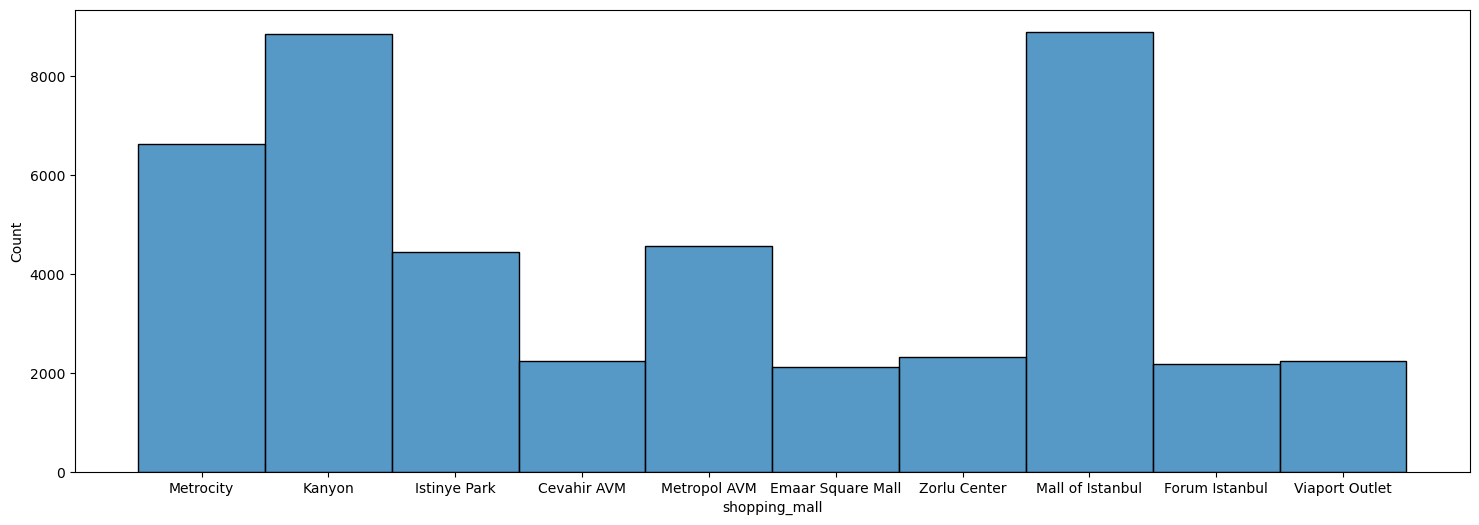

In [66]:
plt.figure(figsize=(18,6))
sns.histplot(data=cash_payment, x='shopping_mall')

In [ ]:
## Which shopping center generated the most cash revenue in the Shoes category?

In [67]:
cash_payment=df1[df1['payment_method'].isin(['Cash'])]

In [68]:
cash_payment_shoes=cash_payment[cash_payment['category'].isin(['Shoes'])]
cash_payment_shoes.groupby('shopping_mall')['price'].sum().sort_values(ascending=False)

shopping_mall
Mall of Istanbul     1669072.77
Kanyon               1664871.58
Metrocity            1146324.70
Metropol AVM          834236.30
Istinye Park          779620.83
Zorlu Center          421919.51
Emaar Square Mall     419518.83
Viaport Outlet        396712.37
Cevahir AVM           383508.63
Forum Istanbul        381708.12
Name: price, dtype: float64

<Axes: xlabel='shopping_mall', ylabel='Count'>

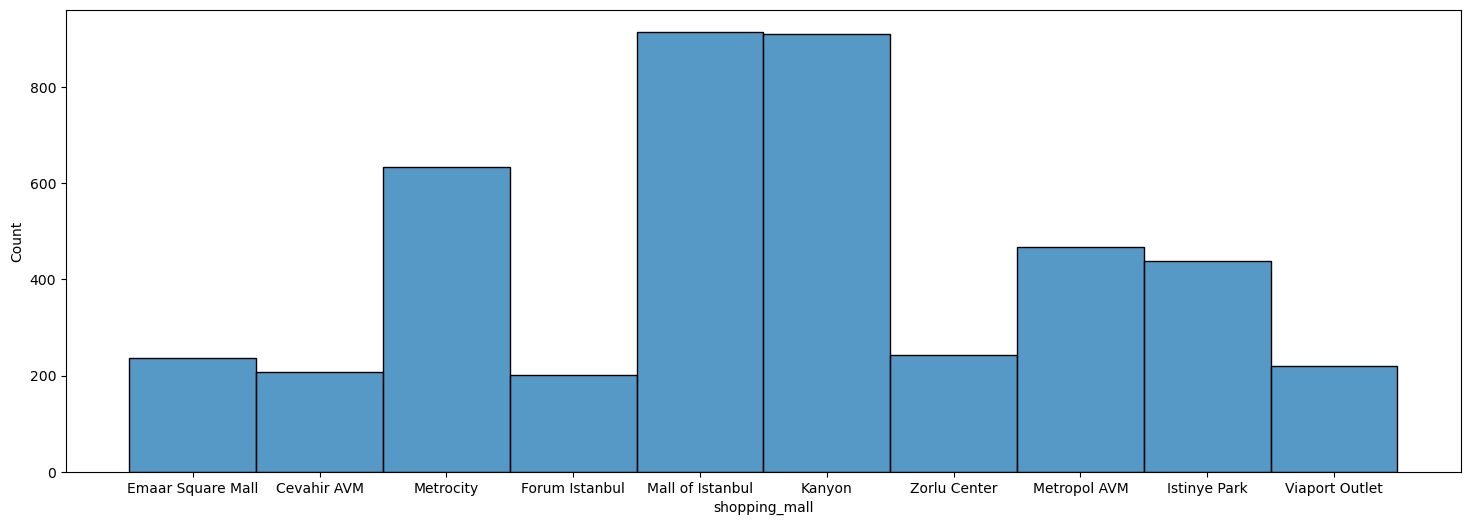

In [69]:
plt.figure(figsize=(18,6))
sns.histplot(data=cash_payment_shoes, x='shopping_mall')

In [ ]:
## Which shopping mall in the Technology category generated the most cash revenue?

In [70]:
cash_payment_technology=cash_payment[cash_payment['category'].isin(['Technology'])]
cash_payment_technology.groupby('shopping_mall')['price'].sum().sort_values(ascending=False)

shopping_mall
Kanyon               1508850.0
Mall of Istanbul     1417500.0
Metrocity            1129800.0
Istinye Park          687750.0
Metropol AVM          642600.0
Viaport Outlet        376950.0
Emaar Square Mall     368550.0
Cevahir AVM           332850.0
Zorlu Center          310800.0
Forum Istanbul        280350.0
Name: price, dtype: float64

<Axes: xlabel='shopping_mall', ylabel='Count'>

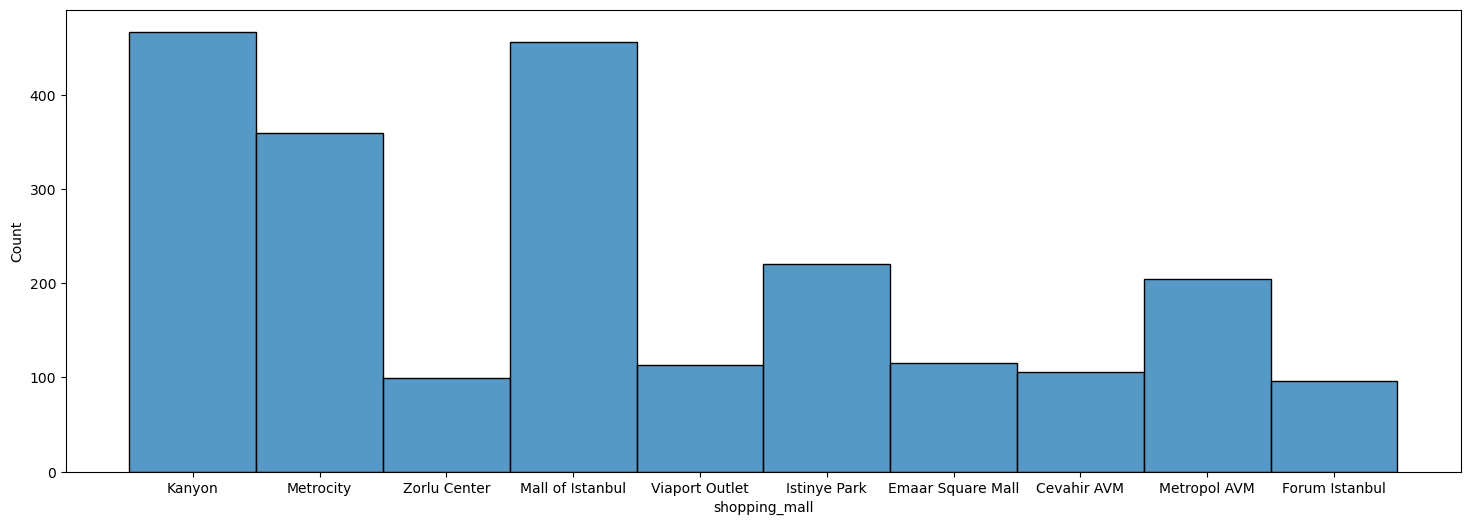

In [71]:
plt.figure(figsize=(18,6))
sns.histplot(data=cash_payment_technology, x='shopping_mall')

In [ ]:
## In which shopping centers do credit card payments generate the most revenue?

In [72]:
credit_card_payment=df1[df1['payment_method'].isin(['Credit Card'])]
credit_card_payment.groupby('shopping_mall')['price'].sum().sort_values(ascending=False)

shopping_mall
Mall of Istanbul     4842875.83
Kanyon               4660884.63
Metrocity            3677033.18
Metropol AVM         2450575.98
Istinye Park         2386228.05
Zorlu Center         1269734.77
Viaport Outlet       1211440.88
Cevahir AVM          1202292.16
Forum Istanbul       1183614.05
Emaar Square Mall    1166797.40
Name: price, dtype: float64

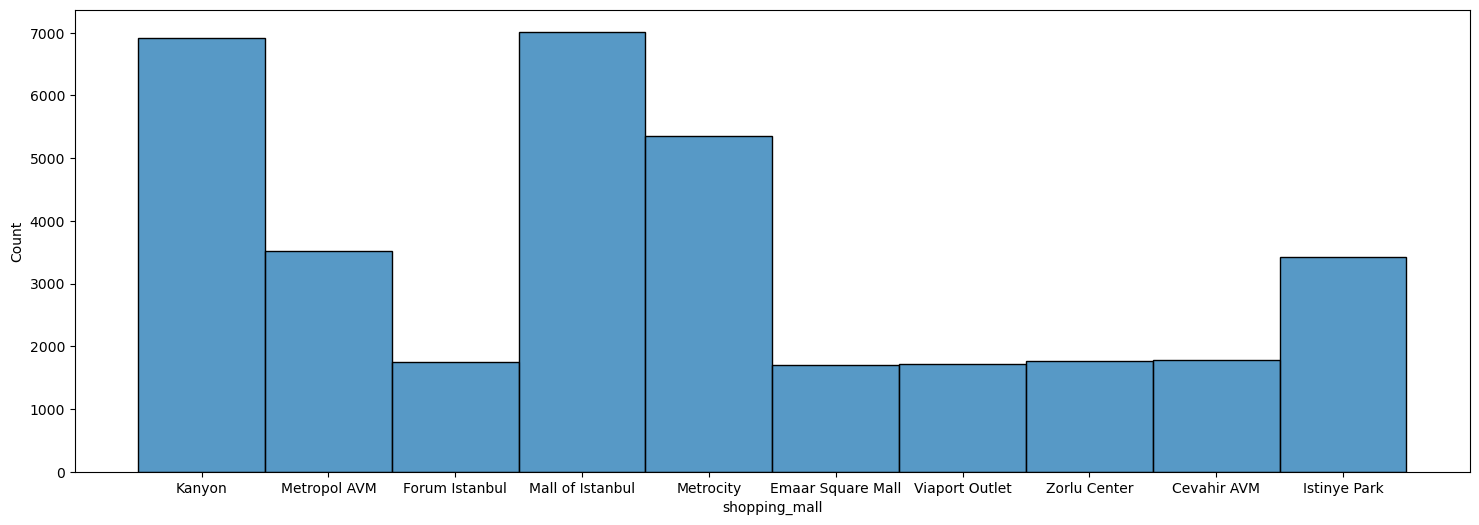

In [75]:
plt.figure(figsize=(18,6))
sns.histplot(data=credit_card_payment, x='shopping_mall')
plt.show()

In [ ]:
## which products sell the most

In [74]:
the_most_popular_products=df1.groupby('category')['quantity'].sum().sort_values(ascending=False)
the_most_popular_products

category
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Toys                30321
Shoes               30217
Technology          15021
Books               14982
Souvenir            14871
Name: quantity, dtype: int64

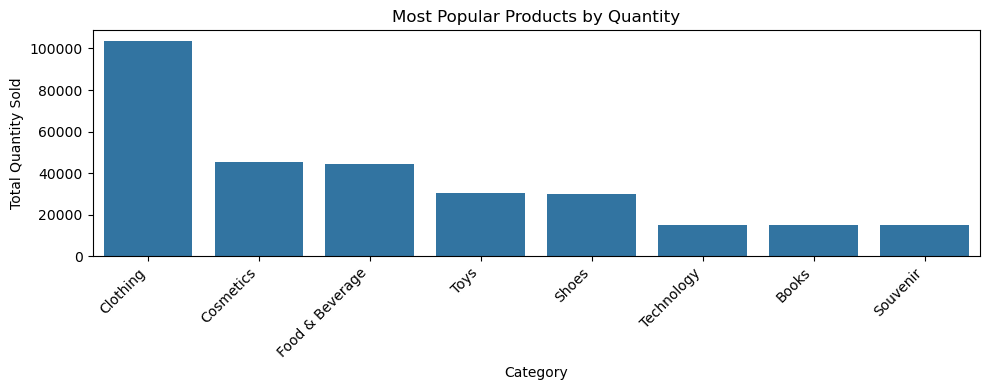

In [76]:
plt.figure(figsize=(10,4))
sns.barplot(x=the_most_popular_products.index, y=the_most_popular_products.values)
plt.title('Most Popular Products by Quantity')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
## Determining Revenue Trends (Price) The fact that a product sells the most does not always mean that it is the most profitable.

In [77]:
the_most_sales=df1.groupby('category')['price'].sum().sort_values(ascending=False)
the_most_sales

category
Clothing           31075684.64
Shoes              18135336.89
Technology         15772050.00
Cosmetics           1848606.90
Toys                1086704.64
Food & Beverage      231568.71
Books                226977.30
Souvenir             174436.83
Name: price, dtype: float64

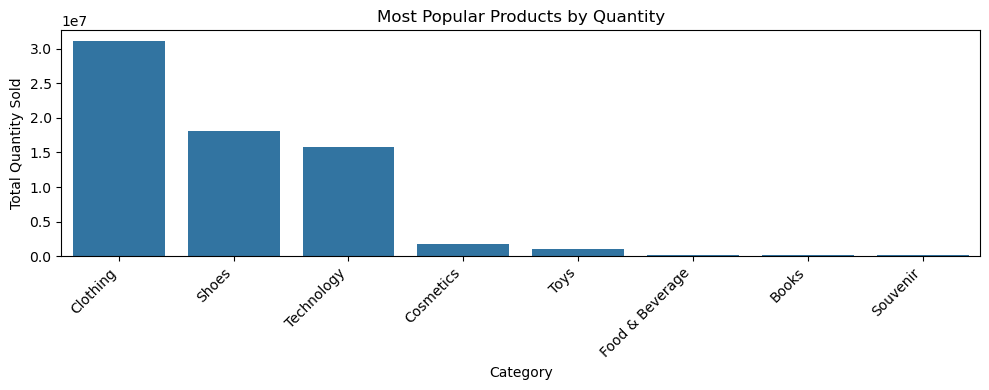

In [78]:
plt.figure(figsize=(10,4))
sns.barplot(x=the_most_sales.index, y=the_most_sales.values)
plt.title('Most Popular Products by Quantity')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
## Although the best-selling products are clothing and cosmetics, the products that generate the most revenue are cosmetics and shoes.

In [79]:
trend_category_age_group=df1.groupby(['age_groups','category'])['quantity'].sum().sort_values(ascending=False)
trend_category_age_group

age_groups  category       
45-69       Clothing           47833
            Cosmetics          21034
            Food & Beverage    20055
35-45       Clothing           20054
25-35       Clothing           19820
25<         Clothing           15851
45-69       Toys               13810
            Shoes              13764
35-45       Food & Beverage     8844
            Cosmetics           8830
25-35       Cosmetics           8724
            Food & Beverage     8533
45-69       Books               6921
25<         Cosmetics           6877
            Food & Beverage     6845
45-69       Technology          6808
            Souvenir            6711
35-45       Shoes               5941
            Toys                5900
25-35       Shoes               5813
            Toys                5802
25<         Toys                4809
            Shoes               4699
35-45       Technology          3168
25-35       Souvenir            2961
35-45       Souvenir            2891
          

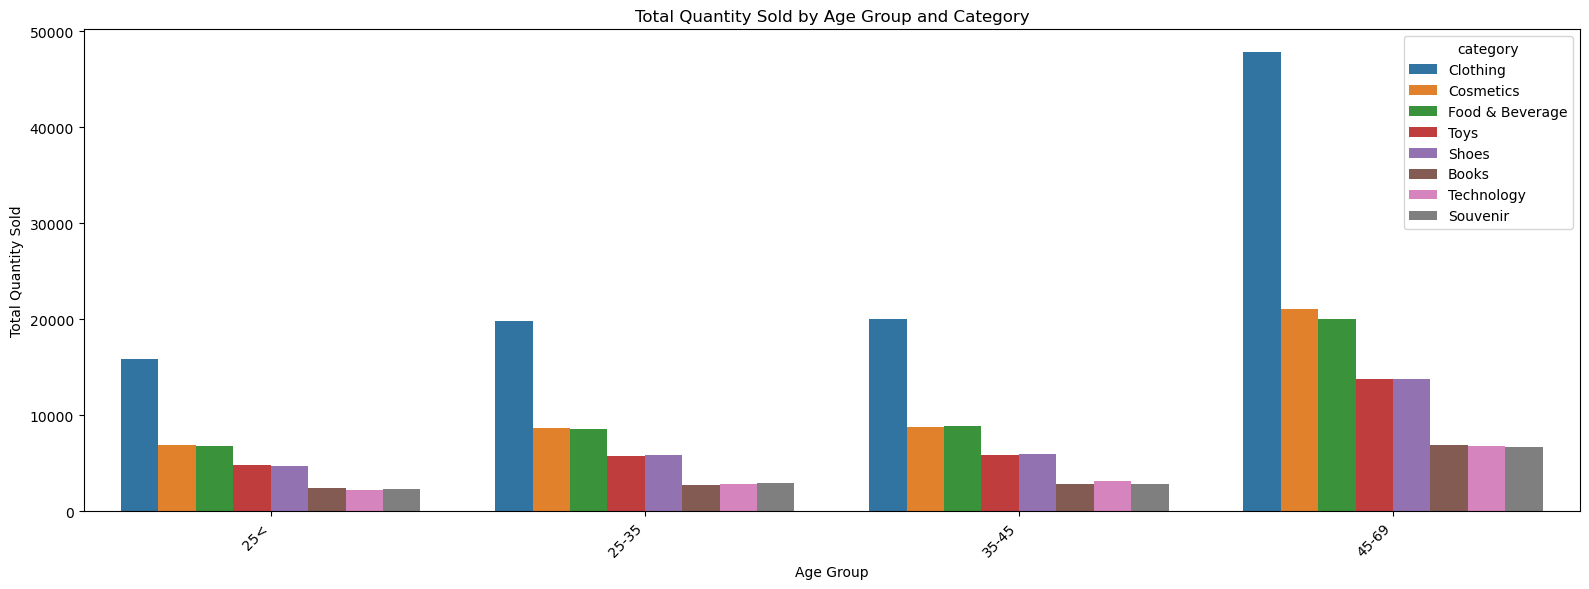

In [80]:
trend_df = trend_category_age_group.reset_index()
plt.figure(figsize=(16,6))
sns.barplot(data=trend_df, x='age_groups', y='quantity', hue='category')
plt.title('Total Quantity Sold by Age Group and Category')
plt.xlabel('Age Group')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [81]:
trend_category_age_group_price=df1.groupby(['age_groups','category'])['price'].sum().sort_values(ascending=False)
trend_category_age_group_price

age_groups  category       
45-69       Clothing           14353726.64
            Shoes               8260739.88
            Technology          7148400.00
35-45       Clothing            6017804.32
25-35       Clothing            5947585.60
25<         Clothing            4756568.08
35-45       Shoes               3565609.97
25-35       Shoes               3488788.21
35-45       Technology          3326400.00
25-35       Technology          2980950.00
25<         Shoes               2820198.83
            Technology          2316300.00
45-69       Cosmetics            855242.44
            Toys                 494950.40
35-45       Cosmetics            359027.80
25-35       Cosmetics            354717.84
25<         Cosmetics            279618.82
35-45       Toys                 211456.00
25-35       Toys                 207943.68
25<         Toys                 172354.56
45-69       Food & Beverage      104887.65
            Books                104853.15
            Souvenir      

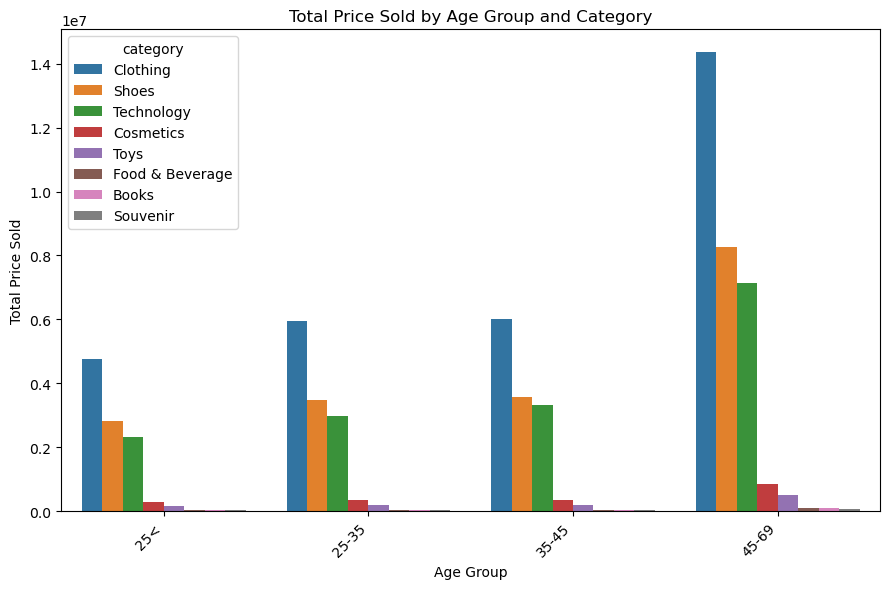

In [82]:
trend_df1 = trend_category_age_group_price.reset_index()
plt.figure(figsize=(9,6))
sns.barplot(data=trend_df1, x='age_groups', y='price', hue='category')
plt.title('Total Price Sold by Age Group and Category')
plt.xlabel('Age Group')
plt.ylabel('Total Price Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
## Trend Analysis over Time (Invoice Date)

In [ ]:
## Revenue growth by month

In [83]:
month_increase=df1.groupby(['month','category'])['price'].sum().reset_index()
month_increase

,month,category,price
0,1,Books,26967.00
1,1,Clothing,3552347.04
2,1,Cosmetics,221231.06
3,1,Food & Beverage,26097.70
4,1,Shoes,2111998.23
...,...,...,...
91,12,Food & Beverage,18812.31
92,12,Shoes,1394795.08
93,12,Souvenir,12680.13
94,12,Technology,1231650.00


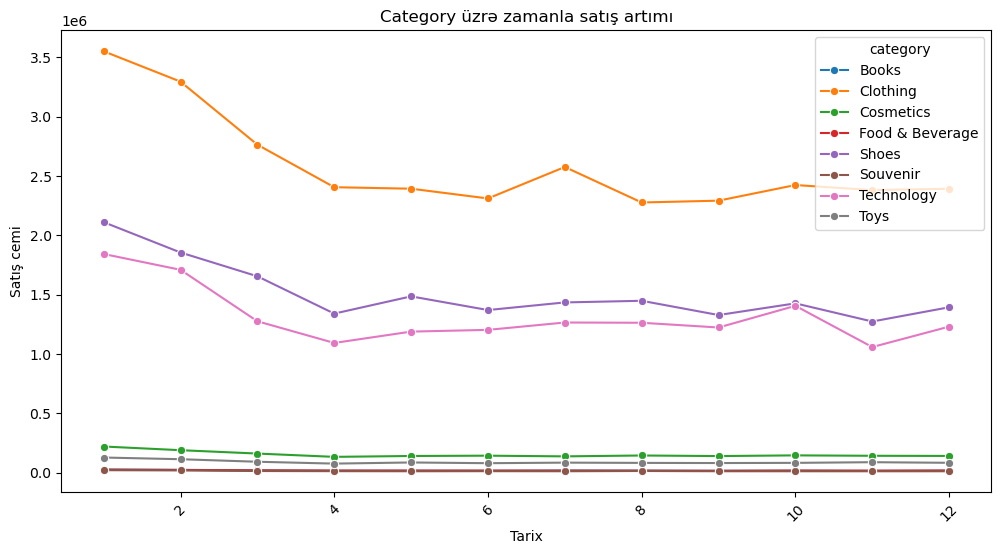

In [84]:
plt.figure(figsize=(12,6))
sns.lineplot(data=month_increase, x='month', y='price', hue='category', marker='o')
plt.title('Category üzrə zamanla satış artımı')
plt.xlabel('Tarix')
plt.ylabel('Satış cemi')
plt.xticks(rotation=45)
plt.show()

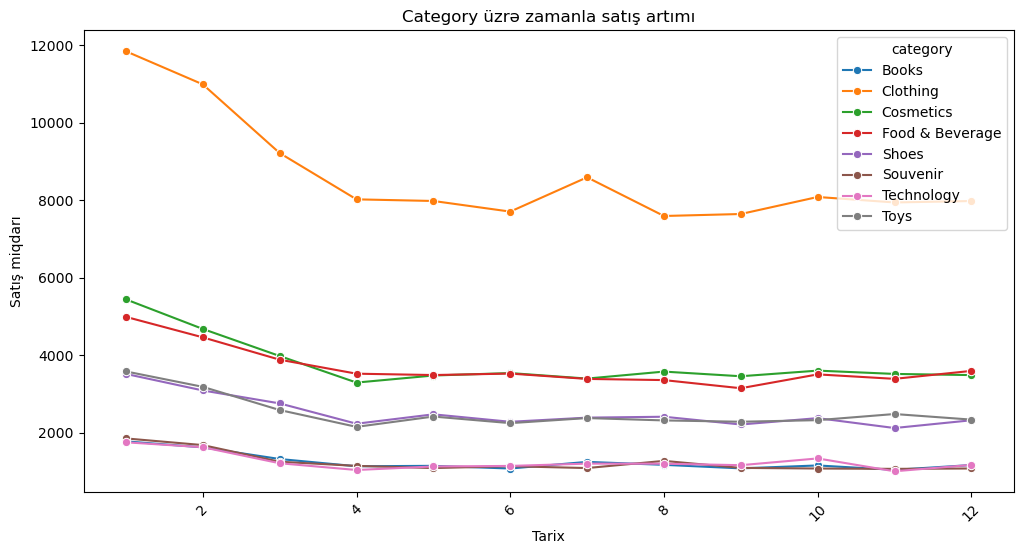

In [85]:
trend = df1.groupby(['month','category'])['quantity'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=trend, x='month', y='quantity', hue='category', marker='o')
plt.title('Category üzrə zamanla satış artımı')
plt.xlabel('Tarix')
plt.ylabel('Satış miqdarı')
plt.xticks(rotation=45)
plt.show()

In [ ]:
## Income growth by province

In [86]:
year_increase=df1.groupby(['year','category'])['price'].sum().reset_index()
year_increase

,year,category,price
0,2021,Books,100065.75
1,2021,Clothing,14365129.68
2,2021,Cosmetics,828081.56
3,2021,Food & Beverage,106179.46
4,2021,Shoes,8242134.61
5,2021,Souvenir,79118.85
6,2021,Technology,7104300.00
7,2021,Toys,491294.72
8,2022,Books,106822.65
9,2022,Clothing,14070451.12


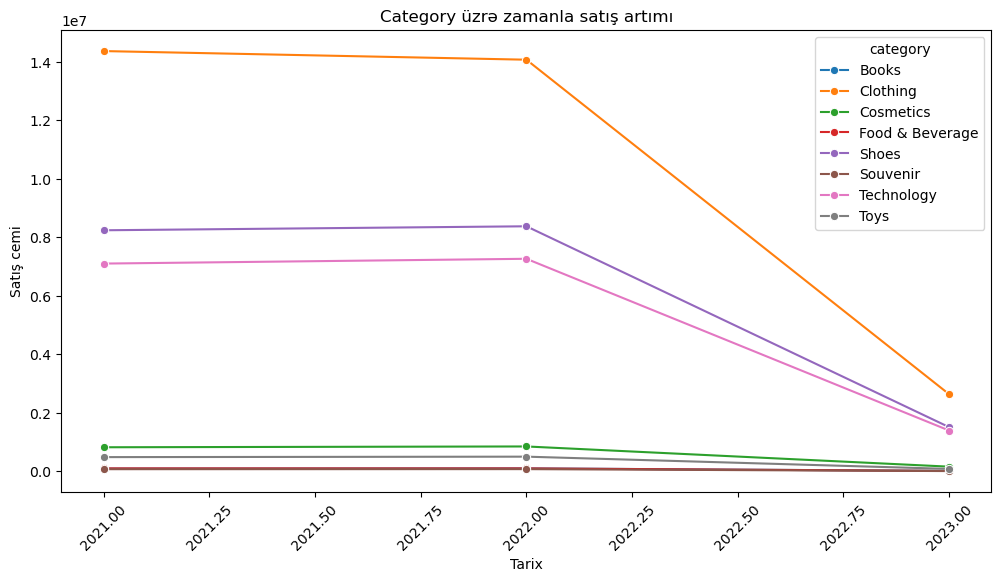

In [87]:
plt.figure(figsize=(12,6))
sns.lineplot(data=year_increase, x='year', y='price', hue='category', marker='o')
plt.title('Category üzrə zamanla satış artımı')
plt.xlabel('Tarix')
plt.ylabel('Satış cemi')
plt.xticks(rotation=45)
plt.show()

In [88]:
year_increase_trend=df1.groupby(['year','category'])['quantity'].sum().reset_index()
year_increase_trend

,year,category,quantity
0,2021,Books,6605
1,2021,Clothing,47871
2,2021,Cosmetics,20366
3,2021,Food & Beverage,20302
4,2021,Shoes,13733
5,2021,Souvenir,6745
6,2021,Technology,6766
7,2021,Toys,13708
8,2022,Books,7051
9,2022,Clothing,46889


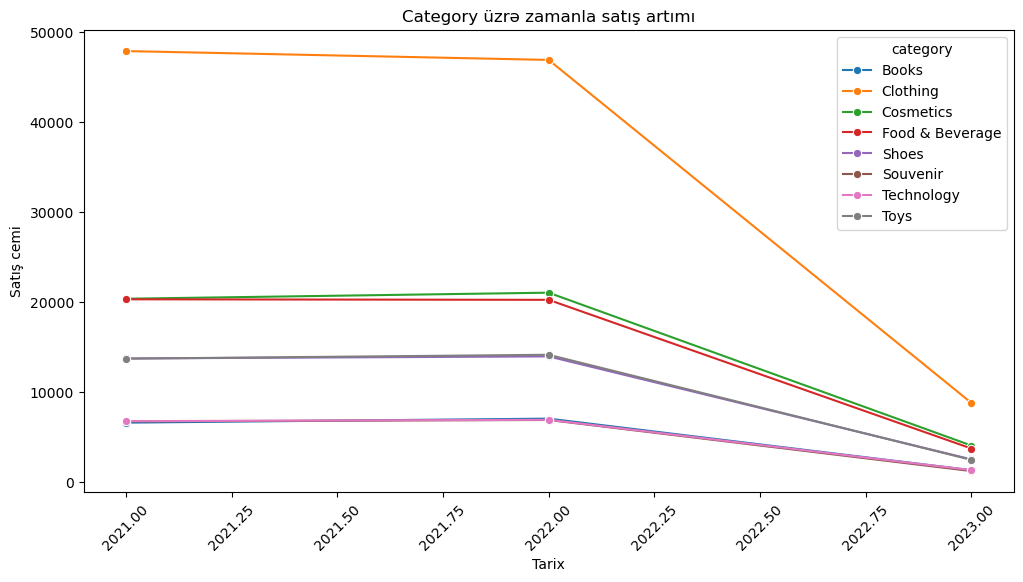

In [89]:
plt.figure(figsize=(12,6))
sns.lineplot(data=year_increase_trend, x='year', y='quantity', hue='category', marker='o')
plt.title('Category üzrə zamanla satış artımı')
plt.xlabel('Tarix')
plt.ylabel('Satış cemi')
plt.xticks(rotation=45)
plt.show()

In [ ]:
## Key Observations
## High Value Categories: Technology and Footwear consistently demonstrate the highest transaction values, with individual purchases often exceeding 2000 currency units (e.g. 5250, 4200, 3000.85). This indicates the existence of a customer segment that is willing to make a significant investment in these products.
## Apparel Category: The apparel category is popular across a wide range of age groups, from youth, to adults, to senior customers. This versatility highlights the need for segmentation for effective marketing.
## Frequent, Small-Volume Purchases: Categories like Food & Beverages and Books are characterized by lower prices. The opportunity here is to increase purchase frequency and total basket size, rather than increasing the unit cost of the product.
## Tech-savvy buyers (ages 40-69) are mature buyers. They are the type of customers who make the highest investments while buying in small quantities. The data clearly shows that customers in their 40s, 50s, and 60s are making high-value transactions, such as $5,250 and $4,200, respectively. For this group, quality, functionality, and long-term value are a priority.
##Targeted Marketing Strategies
## Goal-Increase purchase frequency and average transaction value on fashion-related products.
## Suggested Tactics:
## 1. Social Media Campaigns
## 2. Discounts and Offers
## 3. Create a loyalty program that offers special bonuses or rewards for high-value purchases (5250, 4200) observed in the technology category.
## Daily Necessities Buyers (All age groups)
## 1.Increase total basket volume through cross-selling.